<a href="https://colab.research.google.com/github/vrushab2004/Fraud-Detection-using-python-/blob/main/Fraud_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection using Python

In this project, we analyze a real-world credit card transaction dataset, explore patterns in fraudulent and normal transactions, and build machine learning models to detect fraud.

The main challenges are:

Highly imbalanced data (very few fraud cases)

The need to balance between catching fraud (recall) and avoiding false alarms (precision)

In [ ]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv


--2026-02-10 17:05:01--  https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.207, 192.178.219.207, 74.125.134.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150828752 (144M) [text/csv]
Saving to: ‘creditcard.csv’

creditcard.csv      100%[===================>] 143.84M   112MB/s    in 1.3s    

2026-02-10 17:05:02 (112 MB/s) - ‘creditcard.csv’ saved [150828752/150828752]



In [ ]:
import pandas as pd

df = pd.read_csv("creditcard.csv")

In [ ]:
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The dataset contains 284,807 transactions with 31 features. The target variable Class indicates whether a transaction is fraudulent (1) or normal (0). The dataset is highly imbalanced, with only 492 fraud cases.

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


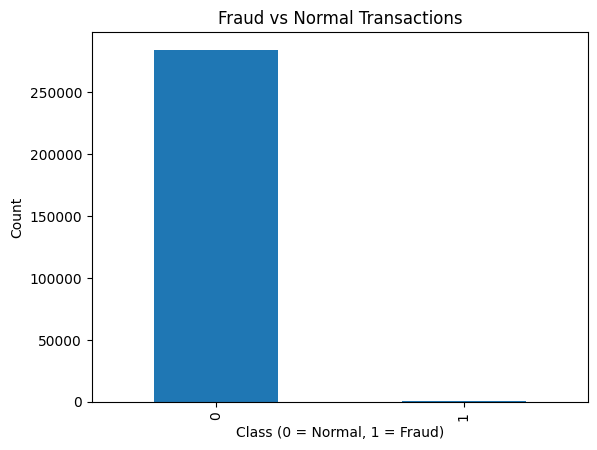

In [ ]:
import matplotlib.pyplot as plt

counts = df['Class'].value_counts()

plt.figure()
counts.plot(kind='bar')
plt.title("Fraud vs Normal Transactions")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.isnull().sum().max()

0

In [ ]:
df['Amount'].describe()

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


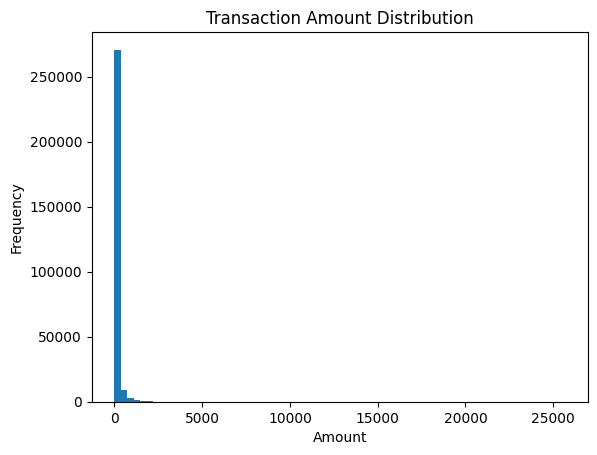

In [ ]:
plt.figure()
plt.hist(df['Amount'], bins=70)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

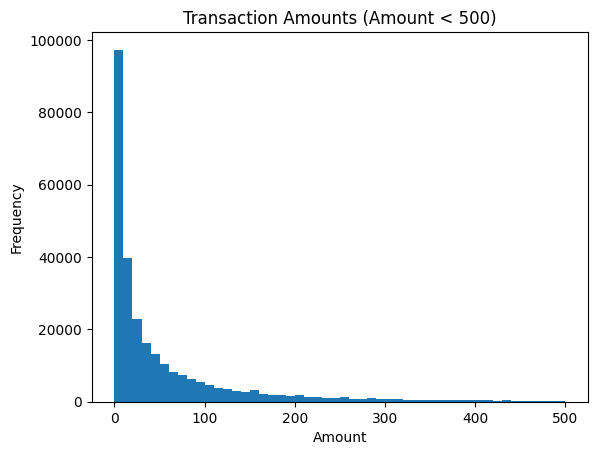

In [ ]:
plt.figure()
plt.hist(df[df['Amount'] < 500]['Amount'], bins=50)
plt.title("Transaction Amounts (Amount < 500)")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


Do fraud transactions have different amounts compared to normal ones?

In [ ]:
# Separate fraud and normal transactions
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

# Show basic stats
print("Fraud Amount Stats:")
print(fraud['Amount'].describe())

print("\nNormal Amount Stats:")
print(normal['Amount'].describe())

Fraud Amount Stats:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal Amount Stats:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


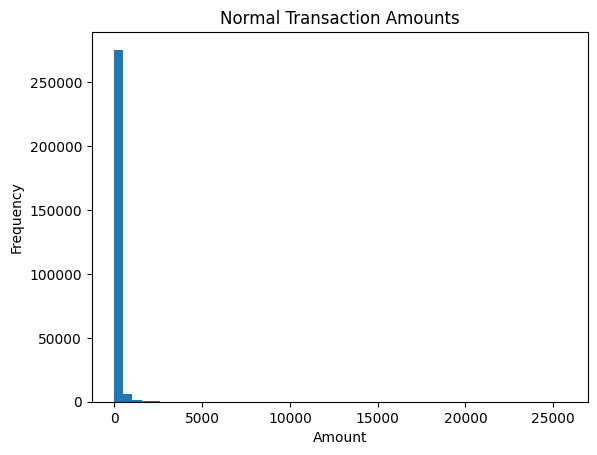

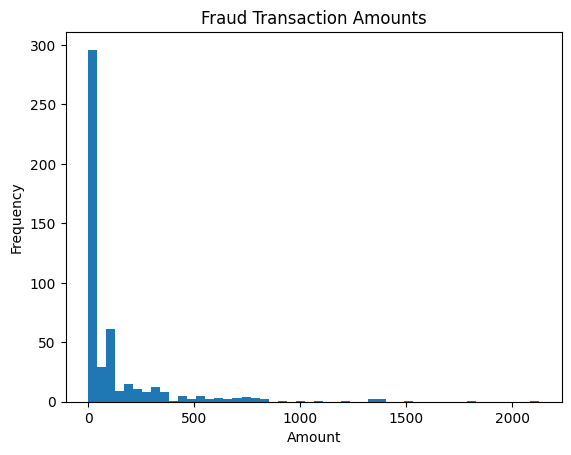

In [ ]:
plt.figure()
plt.hist(normal['Amount'], bins=50)
plt.title("Normal Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(fraud['Amount'], bins=50)
plt.title("Fraud Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Let's choose a threshold for "high amount"
threshold = 1000

# Create a new column: is_high_amount
df['high_amount_flag'] = df['Amount'] > threshold

# How many transactions get flagged?
df['high_amount_flag'].value_counts()


,count
high_amount_flag,
False,281867
True,2940


In [ ]:
# How many of the flagged ones are actually fraud?
flagged = df[df['high_amount_flag'] == True]

flagged['Class'].value_counts()


,count
Class,
0,2931
1,9


In [ ]:
# Let's look at fraud transactions with high amount
fraud[fraud['Amount'] > 1000].shape


(9, 31)

In [ ]:
# What is the maximum amount in fraud?
fraud['Amount'].max()


2125.87

In [ ]:
print("Fraud Time Stats:")
print(fraud['Time'].describe())

print("\nNormal Time Stats:")
print(normal['Time'].describe())


Fraud Time Stats:
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal Time Stats:
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


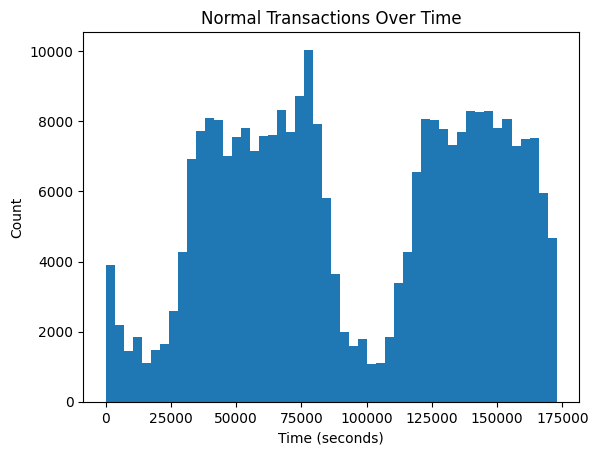

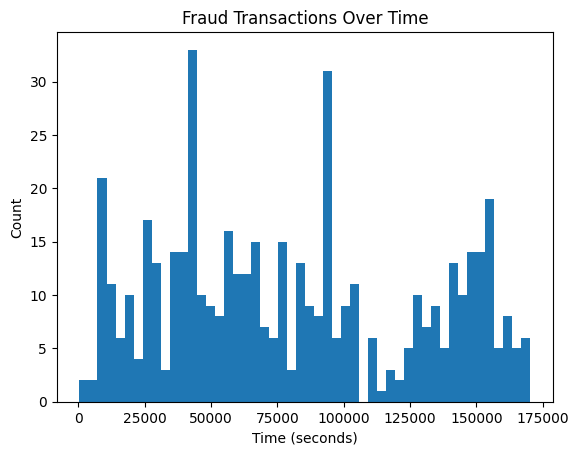

In [ ]:
plt.figure()
plt.hist(normal['Time'], bins=50)
plt.title("Normal Transactions Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Count")
plt.show()

plt.figure()
plt.hist(fraud['Time'], bins=50)
plt.title("Fraud Transactions Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Count")
plt.show()


We use Logistic Regression as a baseline machine learning model. Since the dataset is highly imbalanced, accuracy is not a reliable metric. Instead, we evaluate the model using precision, recall, and F1-score.

Two models are trained:

A standard Logistic Regression model

A class-balanced Logistic Regression model to increase fraud recall

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [ ]:
X = df.drop('Class', axis=1)  # features
y = df['Class']               # target (fraud or not)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.63      0.73       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')


In [ ]:
model_bal = LogisticRegression(max_iter=1000, class_weight='balanced')
model_bal.fit(X_train, y_train)

y_pred_bal = model_bal.predict(X_test)

print(classification_report(y_test, y_pred_bal))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.86      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The baseline Logistic Regression model achieved high precision for fraud detection but only moderate recall, meaning it missed some fraudulent transactions.

After applying class balancing, the model’s recall improved significantly, catching more fraud cases. However, this came at the cost of very low precision, resulting in many false positives.

This demonstrates the real-world trade-off in fraud detection systems between catching more fraud and minimizing false alarms.